<div style = "text-align:center"><h1><span style="color:#003d79;border-bottom: 3px solid #0A66C2">FINANCE E-COMMERCE DATASET ANALYSIS</span></h1></div>


## 📖 **Introduction**

<div style="font-family: 'calibri', sans-serif; line-height: 1.6; "><p style="font-size: 16px; text-align: justify;">The Finance Ecommerce Dataset Analysis project aims to explore, clean, and analyze a large dataset containing detailed financial transaction records from an e-commerce platform. This dataset provides a comprehensive view of customer purchasing behavior, transaction trends, and potential indicators of fraudulent activity.</p>

<div style="font-family: 'calibri', sans-serif; line-height: 1.6; "><p style="font-size: 16px; text-align: justify;">
The dataset includes key financial and demographic attributes such as TransactionID, Date, AccountID, TransactionType, Amount, Balance, and Currency, along with merchant-related details like Merchant, Category, and Subcategory. It also incorporates customer information such as Country, City, PostalCode, Email, Phone, and CustomerSince, enabling deeper insights into geographic and behavioral spending patterns.
</p>


## 📊 **Dataset Description**

**Source of Topic**- Google

**Download URL**- https://github.com/ranilnelluvai/Finance_Ecommerce_Dirty_Dataset/blob/main/Finance_Ecommerce_Dirty_Dataset_csv.csv

**No.of Rows And Columns**- 23 columns  , 6061 rows

**Aim of projects** - This dataset is intentionally messy — great for data cleaning, parsing, anomaly detection, and validation exercises.The analysis involves examining the ecommerce data set of different countries

**File Type** - csv

**File Name** - Finance_Ecommerce_Dirty_Dataset_csv.csv


## 🎯 **Objective**

<div style="font-family: 'calibri', sans-serif; line-height: 1.6; "><p style="font-size: 16px; text-align: justify;">The primary objective of this analysis is to explore and understand financial transaction data from an e-commerce platform. Using Python, we aim to clean, transform, and analyze the dataset to extract valuable business insights — such as spending patterns, fraud detection, customer behavior, and transaction trends over time.</p>

1. **Cleaning & Standardization**
2. **Sales performance dashboard**
3. **Total spent by category**
4. **Monthly transaction trends**
5. **Anomaly detection: flag unusually high/low amounts**
6. **Segmentation: group customers by spending categories**
7. **Geographic analysis: spending by city/country**

## 📂 IMPORT LIBRARIES

In [43]:
import warnings
warnings.filterwarnings("ignore")   
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import numpy as np
import time
import requests
from bs4 import BeautifulSoup
import squarify  # for tree maps



## 📂 LOAD DATA

In [44]:
try:
    df = pd.read_csv("Finance_Ecommerce_Dirty_Dataset_csv.csv")
    print("CSV loaded successfully!\n")
except FileNotFoundError:
    print("CSV file not found. Please check the file name or path.")

CSV loaded successfully!



### 🔍  DATA EXPLORATION / OVERVIEW

 <h4 style="font-weight: bold;color:red"> List columns</h4>

In [45]:
df.columns.tolist()

['TransactionID',
 'Date',
 'AccountID',
 'AccountName',
 'TransactionType',
 'Amount',
 'Currency',
 'ExchangeRate',
 'Balance',
 'Merchant',
 'MerchantPhone',
 'MerchantEmail',
 'Category',
 'Subcategory',
 'Country',
 'City',
 'PostalCode',
 'CardNumber',
 'Email',
 'Phone',
 'IsFraud',
 'Notes',
 'CustomerSince']

 <h4 style="font-weight: bold;color:red"> Top 5 Rows</h4>

In [46]:
df.head()

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,CustomerSince
0,TX103251,4/3/2025,AC3973,Arjun Sharma,Debit,47.36,USD,80.6864,-1714968.59,ShopEasy,...,Books,UK,Pune,153621.0,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,-4.469492e+09,No,repeat purchase,16/09/2018
1,TX101874,10/8/2024,AC8970,Dev Kumar,Debit,159.55,inr,1.0000,-1162428.75,AutoZone,...,Concert,Australia,Delhi,380312.0,XXXX-XXXX-5979,dev.kumar@yahoo.com,5.882006e+09,No,cashback credited,11/7/2022
2,TX103746,9/14/2024,AC3777,Amit Gupta,Debit,2.43,GBP,102.0148,-2085783.34,BigBasket,...,Specialty,USA,Gurugram,NaN,XXXX-XXXX-2243,amit.gupta@example.com,8.832898e+08,No,cashback credited,Aug-21
3,TX105269,12/21/2024,AC9635,Ritu Roy,Refund,78.96,AED,18.1216,-2727243.49,ShopEasy,...,Restaurant,Australia,Mumbai,793747.0,XXXX-XXXX-9279,ritu.roy@hotmail.com,6.845400e+09,No,suspected fraud,2024
4,TX100463,4/14/2024,AC1329,Raj Bose,Refund,42.81,USD,78.4379,-259175.06,LocalMart,...,FastFood,USA,Mumbai,755067.0,NaN,raj.bose@hotmail.com,1.228611e+09,No,cashback credited,3/2/2023


 <h4 style="font-weight: bold;color:red"> Bottom 5 Rows</h4>

In [47]:
df.tail()

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,CustomerSince
6055,TX105699,10/16/2023,AC5214,Vikram Iyer,Credit,69.09,USD,76.4757,"?-2,901,016.18",AutoZone,...,Hotel,UAE,Pune,856227.0,XXXX-XXXX-6489,vikram.iyer@yahoo.com,4.081945e+09,No,chargeback requested,2021
6056,TX102550,7/25/2025,AC8982,Anita Reddy,debit,4.94,USD,79.1632,-1557558.39,ShopEasy,...,Concert,Australia,Bengaluru,235120.0,XXXX-XXXX-5540,anita.reddy@gmail.com,2.586561e+09,No,monthly subscription,5/27/2023
6057,TX100537,9/24/2023,AC5308,Rohit Kumar,Credit,20.87,AED,19.7547,-276412.59,Amazon,...,Pharmacy,UAE,Mumbai,263866.0,XXXX-XXXX-XXXX-6774,rohit.kumar@hotmail.com,NaN,No,NaN,unknown
6058,TX101220,3/25/2024,AC7593,Sana Reddy,Credit,7.96,USD,76.8570,-593859.37,Reliance,...,Men,India,Hyderabad,152222.0,XXXX-XXXX-7745,sana.reddy@yahoo.com,6.866496e+09,No,manual adjustment,Aug-19
6059,TX104271,2/3/2025,AC4810,Neha Reddy,Credit,17.66,INR,1.0000,-2254562.37,ElectroWorld,...,Accessory,UK,Chennai,347582.0,XXXX-XXXX-XXXX-9831,neha.reddy@example.com,1.500553e+09,No,monthly subscription,20/06/2020


 <h4 style="font-weight: bold;color:red"> Summarization of the dataset</h4>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    6057 non-null   object 
 1   Date             6060 non-null   object 
 2   AccountID        6059 non-null   object 
 3   AccountName      6059 non-null   object 
 4   TransactionType  6058 non-null   object 
 5   Amount           6059 non-null   object 
 6   Currency         6055 non-null   object 
 7   ExchangeRate     6058 non-null   float64
 8   Balance          5988 non-null   object 
 9   Merchant         6058 non-null   object 
 10  MerchantPhone    4647 non-null   float64
 11  MerchantEmail    4222 non-null   object 
 12  Category         6058 non-null   object 
 13  Subcategory      6055 non-null   object 
 14  Country          6058 non-null   object 
 15  City             6058 non-null   object 
 16  PostalCode       5742 non-null   float64
 17  CardNumber    

 <h4 style="font-weight: bold;color:red"> Generate descriptive statistics of numerical columns</h4>

In [49]:
df.describe()

,ExchangeRate,MerchantPhone,PostalCode,Phone
count,6058.000000,4.647000e+03,5742.000000,5.732000e+03
mean,46.319508,3.094016e+09,534220.496517,2.977499e+09
std,40.254595,4.852691e+09,274401.478310,4.946857e+09
min,1.000000,-9.981343e+09,102.000000,-9.985638e+09
25%,1.000000,7.206737e+08,299628.500000,6.050150e+08
50%,72.091800,3.827888e+09,538097.500000,3.779223e+09
75%,80.274425,6.838675e+09,775529.500000,6.829491e+09
max,109.968400,9.999725e+09,999962.000000,9.999725e+09


 <h4 style="font-weight: bold;color:red"> Shape</h4>

In [50]:
df.shape

(6060, 23)

 <h4 style="font-weight: bold;color:red"> Missing values per column</h4>

In [51]:
df.isnull().sum()

TransactionID         3
Date                  0
AccountID             1
AccountName           1
TransactionType       2
Amount                1
Currency              5
ExchangeRate          2
Balance              72
Merchant              2
MerchantPhone      1413
MerchantEmail      1838
Category              2
Subcategory           5
Country               2
City                  2
PostalCode          318
CardNumber          439
Email               259
Phone               328
IsFraud              76
Notes               804
CustomerSince         2
dtype: int64

 <h4 style="font-weight: bold;color:red"> DUPLICATE</h4>

In [52]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1


### 🧹  DATA CLEANING

In [53]:
#data cleaning of column TransactionID
# Rows with null TransactionID removed & Duplicate TransactionID rows removed
df = df.dropna(subset=["TransactionID"])
df = df.drop_duplicates(subset=["TransactionID"], keep="first").reset_index(drop=True)




#data cleaning of column AccountID
# Rows with null AccountID replaced witj n/a
df["AccountID"] = df["AccountID"].replace("", np.nan) 
df["AccountID"] = df["AccountID"].fillna("n/a")




#data cleaning of column AccountName
# Rows with null AccountName replaced witj n/a
df["AccountName"] = df["AccountName"].replace("", np.nan) 
df["AccountName"] = df["AccountName"].fillna("n/a")



#data cleaning of column TransactionType
# Rows with null TransactionType replaced witj n/a
# Rows of TransactionType replaced to uppercase
df["TransactionType"] = df["TransactionType"].replace("", np.nan) 
df["TransactionType"] = df["TransactionType"].fillna("n/a")
df["TransactionType"] = df["TransactionType"].astype(str).str.upper()



#data cleaning of column Amount
# Rows with null Amount replaced with n/a
# datatype of Amount changed to float
df["Amount"] = df["Amount"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df["Amount"] = df["Amount"].replace("", np.nan).astype(float)



#data cleaning of column Currency
# Rows with null Currency replaced witj n/a
# Rows of Currency replaced to uppercase
df["Currency"] = df["Currency"].replace("", np.nan) 
df["Currency"] = df["Currency"].fillna("n/a")
df["Currency"] = df["Currency"].astype(str).str.upper()


#data cleaning of column ExchangeRate
# Rows with null ExchangeRate replaced witj 0
df["ExchangeRate"] = df["ExchangeRate"].replace("", np.nan)
df["ExchangeRate"] = df["ExchangeRate"].fillna(0)



#data cleaning of column Balance
# Rows with non numeric charracters in column  Balance removed
# datatype of Balance changed to float
# Rows with null in column  Balance replaced by mean value
df["Balance"] = df["Balance"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df["Balance"] = df["Balance"].replace("", np.nan).astype(float)
mean_balance = df["Balance"].mean()
df["Balance"] = df["Balance"].fillna(mean_balance)




#data cleaning of column Merchant
# Rows with null in column  Merchant replaced by n/a
df["Merchant"] = df["Merchant"].replace("", "n/a").fillna("n/a")


#data cleaning of column MerchantPhone
# Rows with non numeric charracters in column  MerchantPhone removed
# Rows with null in column  MerchantPhone replaced by 0
df["MerchantPhone"] = df["MerchantPhone"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df["MerchantPhone"] = df["MerchantPhone"].replace("", 0).fillna(0)


#data cleaning of column MerchantEmail
# Rows with null in column  MerchantEmail replaced by n/a
df["MerchantEmail"] = df["MerchantEmail"].replace("", "n/a").fillna("n/a")


#data cleaning of column Category
# Rows with null in column  Category replaced by n/a
df["Category"] = df["Category"].replace("", "n/a").fillna("n/a")


#data cleaning of column Subcategory
# Rows with null in column  Subcategory replaced by n/a
df["Subcategory"] = df["Subcategory"].replace("", "n/a").fillna("n/a")


#data cleaning of column Country
# Rows with null in column  Country replaced by n/a
df["Country"] = df["Country"].replace("", "n/a").fillna("n/a")


#data cleaning of column City
# Rows with null in column  City replaced by n/a
df["City"] = df["City"].replace("", "n/a").fillna("n/a")


#data cleaning of column CardNumber
# Rows with null in column  CardNumber replaced by n/a
df["CardNumber"] = df["CardNumber"].replace("", "n/a").fillna("n/a")


#data cleaning of column Email
# Rows with null in column  Email replaced by n/a
df["Email"] = df["Email"].replace("", "n/a").fillna("n/a")


#data cleaning of column Phone
# Rows with non numeric charracters in column  Phone removed
# Rows with null in column  Phone replaced by 0
# datatype of Phone changed to integer
df["Phone"] = df["Phone"].replace("-", "").fillna(0)
df["Phone"] = df["Phone"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df["Phone"] = pd.to_numeric(df["Phone"], errors="coerce").astype("Int64")


#data cleaning of column IsFraud
# Rows with null in column  IsFraud replaced by n/a
df["IsFraud"] = df["IsFraud"].replace("", "n/a").fillna("n/a")


#data cleaning of column Notes
# Rows with null in column  Notes replaced by n/a
df["Notes"] = df["Notes"].replace("", "n/a").fillna("n/a")


#data cleaning of column PostalCode
# Rows with non numeric charracters in column  PostalCode removed
# Rows with null in column  PostalCode replaced by 0
# datatype of PostalCode changed to integer
df["PostalCode"] = df["PostalCode"].replace(["n/a", "N/A", "na", "<NA>","NA"], np.nan)
df["PostalCode"] = df["PostalCode"].dropna().astype(float).astype("Int64")
df["PostalCode"] = df["PostalCode"].fillna(0)


#data cleaning of column PostalCode removed unnecessasary column
df = df.drop(columns=["CustomerSince"])
print("unwanted Column 'CustomerSince' deleted")

df.head(10)

unwanted Column 'CustomerSince' deleted


,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Category,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes
0,TX103251,4/3/2025,AC3973,Arjun Sharma,DEBIT,47.36,USD,80.6864,1714968.59,ShopEasy,...,Education,Books,UK,Pune,153621,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,4469491713,No,repeat purchase
1,TX101874,10/8/2024,AC8970,Dev Kumar,DEBIT,159.55,INR,1.0000,1162428.75,AutoZone,...,Entertainment,Concert,Australia,Delhi,380312,XXXX-XXXX-5979,dev.kumar@yahoo.com,5882006077,No,cashback credited
2,TX103746,9/14/2024,AC3777,Amit Gupta,DEBIT,2.43,GBP,102.0148,2085783.34,BigBasket,...,Groceries,Specialty,USA,Gurugram,0,XXXX-XXXX-2243,amit.gupta@example.com,883289751,No,cashback credited
3,TX105269,12/21/2024,AC9635,Ritu Roy,REFUND,78.96,AED,18.1216,2727243.49,ShopEasy,...,Dining,Restaurant,Australia,Mumbai,793747,XXXX-XXXX-9279,ritu.roy@hotmail.com,6845399861,No,suspected fraud
4,TX100463,4/14/2024,AC1329,Raj Bose,REFUND,42.81,USD,78.4379,259175.06,LocalMart,...,Dining,FastFood,USA,Mumbai,755067,n/a,raj.bose@hotmail.com,1228611124,No,cashback credited
5,TX105222,5/20/2025,AC4567,Maya Patel,REFUND,25.28,INR,1.0000,2681033.19,Amazon,...,Utilities,Electricity,India,Hyderabad,915819,XXXX-XXXX-4011,maya.patel@example.com,7629416248,No,n/a
6,TX101095,9/14/2023,AC1401,Dev Iyer,CREDIT,30.06,USD,80.9396,554639.12,Starbucks,...,Utilities,Electricity,India,Jaipur,880938,XXXX-XXXX-9517,dev.iyer@example.com,0,No,manual adjustment
7,TX104232,10/23/2023,AC3573,Priya Mehta,CREDIT,15.91,INR,1.0000,2238462.32,AutoZone,...,Travel,Flight,UAE,Mumbai,267413,XXXX-XXXX-3629,priya.mehta@example.com,8044301765,No,n/a
8,TX103255,10/31/2023,AC7007,Neha Roy,REFUND,39.56,GBP,109.7276,1773994.74,Myntra,...,Automotive,Fuel,UK,Jaipur,326900,XXXX-XXXX-XXXX-2630,neha.roy@hotmail.com,5473229213,No,manual adjustment
9,TX100757,2/7/2024,AC1584,Priya Reddy,REFUND,41.34,USD,82.6800,445835.54,Reliance,...,Health,Clinic,UK,Pune,135022,n/a,priya.reddy@hotmail.com,1776923306,No,repeat purchase


### 🔍  DATA EXPLORATION AFTER CLEANING

 <h4 style="font-weight: bold;color:red"> Shape</h4>

In [54]:
df.shape

(5997, 22)

 <h4 style="font-weight: bold;color:red"> Missing values</h4>

In [55]:
df.isnull().sum()

TransactionID      0
Date               0
AccountID          0
AccountName        0
TransactionType    0
Amount             0
Currency           0
ExchangeRate       0
Balance            0
Merchant           0
MerchantPhone      0
MerchantEmail      0
Category           0
Subcategory        0
Country            0
City               0
PostalCode         0
CardNumber         0
Email              0
Phone              0
IsFraud            0
Notes              0
dtype: int64

 <h4 style="font-weight: bold;color:red"> Top 100 Rows</h4>

In [56]:
df.head(100)

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Category,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes
0,TX103251,4/3/2025,AC3973,Arjun Sharma,DEBIT,47.36,USD,80.6864,1714968.59,ShopEasy,...,Education,Books,UK,Pune,153621,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,4469491713,No,repeat purchase
1,TX101874,10/8/2024,AC8970,Dev Kumar,DEBIT,159.55,INR,1.0000,1162428.75,AutoZone,...,Entertainment,Concert,Australia,Delhi,380312,XXXX-XXXX-5979,dev.kumar@yahoo.com,5882006077,No,cashback credited
2,TX103746,9/14/2024,AC3777,Amit Gupta,DEBIT,2.43,GBP,102.0148,2085783.34,BigBasket,...,Groceries,Specialty,USA,Gurugram,0,XXXX-XXXX-2243,amit.gupta@example.com,883289751,No,cashback credited
3,TX105269,12/21/2024,AC9635,Ritu Roy,REFUND,78.96,AED,18.1216,2727243.49,ShopEasy,...,Dining,Restaurant,Australia,Mumbai,793747,XXXX-XXXX-9279,ritu.roy@hotmail.com,6845399861,No,suspected fraud
4,TX100463,4/14/2024,AC1329,Raj Bose,REFUND,42.81,USD,78.4379,259175.06,LocalMart,...,Dining,FastFood,USA,Mumbai,755067,n/a,raj.bose@hotmail.com,1228611124,No,cashback credited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TX105996,9/12/2023,AC8311,Karan Das,DEBIT,132.05,INR,1.0000,2936292.47,ShopEasy,...,Electronics,Laptop,USA,Jaipur,280765,4.56643E+15,karan.das@example.com,7871265845,No,suspected fraud
96,TX105424,9/26/2024,AC5730,Raj Chopra,CREDIT,26.76,GBP,103.2226,2775577.18,Starbucks,...,Electronics,Accessory,India,Gurugram,804489,XXXX-XXXX-XXXX-5776,n/a,9686127907,No,monthly subscription
97,TX100658,5/2/2025,AC4558,Sam Patel,DEBIT,42.00,AED,19.7965,434795.16,Paytm Mall,...,Health,Clinic,UK,Delhi,542967,XXXX-XXXX-XXXX-9882,sam.patel@gmail.com,1103719244,No,manual adjustment
98,TX101966,5/8/2025,AC7789,Asha Joshi,DEBIT,26.13,USD,72.1281,1170364.46,Amazon,...,Dining,Cafe,Canada,Mumbai,430125,XXXX-XXXX-3072,asha.joshiyahoo.com,2610524342,No,n/a


 <h4 style="font-weight: bold;color:red"> DUPLICATE</h4>

In [57]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## 📂 EXPORT DATA

In [58]:
df.to_csv("Finance_Ecommerce_Dirty_Dataset_csv_Cleaned.csv", index=False)

print("Cleaned data exported successfully to Finance_Ecommerce_Dirty_Dataset_csv_Cleaned.csv")

Cleaned data exported successfully to Finance_Ecommerce_Dirty_Dataset_csv_Cleaned.csv


 ## 🛠  **Exploratory Data Analysis (EDA)**

Univariate, bivariate, and multivariate analysis 
# Univariate Analysis

 <h4 style="font-weight: bold;color:red"> Missing values in column</h4>

In [59]:
df.isnull().sum()

TransactionID      0
Date               0
AccountID          0
AccountName        0
TransactionType    0
Amount             0
Currency           0
ExchangeRate       0
Balance            0
Merchant           0
MerchantPhone      0
MerchantEmail      0
Category           0
Subcategory        0
Country            0
City               0
PostalCode         0
CardNumber         0
Email              0
Phone              0
IsFraud            0
Notes              0
dtype: int64

 <h4 style="font-weight: bold;color:red"> Numeric Summary</h4>

In [60]:
display(df.describe())


,Amount,ExchangeRate,Balance,PostalCode,Phone
count,5997.000000,5997.000000,5.997000e+03,5997.0,5997.0
mean,1084.542986,46.282295,1.630038e+06,506355.481074,4729053706.301985
std,13219.947903,40.247910,8.672480e+05,292280.310598,3032765076.412652
min,0.680000,0.000000,9.341190e+03,0.0,0.0
25%,15.190000,1.000000,9.876250e+05,264373.0,2079283080.0
50%,34.390000,72.090500,1.641477e+06,510813.0,4733426334.0
75%,77.360000,80.251700,2.462818e+06,764189.0,7306091097.0
max,659580.000000,109.968400,2.936329e+06,999962.0,9999724790.0


 <h4 style="font-weight: bold;color:red"> Categorical Summary</h4>

In [61]:
display(df.describe(include="object"))

,TransactionID,Date,AccountID,AccountName,TransactionType,Currency,Merchant,MerchantPhone,MerchantEmail,Category,Subcategory,Country,City,CardNumber,Email,IsFraud,Notes
count,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997,5997
unique,5997,731,4409,618,4,10,15,3162,15,10,26,7,11,4855,1779,4,16
top,TX104271,7/15/2024,AC6036,Lina Kumar,DEBIT,USD,Paytm Mall,0,n/a,Education,Books,UK,Kolkata,n/a,n/a,No,n/a
freq,1,18,6,31,3064,1965,455,1398,1818,637,349,1071,644,433,256,5859,791


<h4 style="font-weight: bold;color:red"> Plot a Histogram</h4>

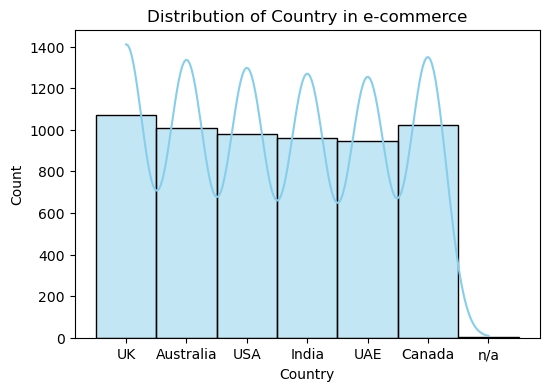

In [62]:
# Visualizations Distribution of Country in e-commerce

plt.figure(figsize=(6,4))
sns.histplot(df['Country'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Country in e-commerce")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Which countries are most active

The dataset is heavily skewed toward Asian and North American markets

How steeply activity drops after the top few countries

<h4 style="font-weight: bold;color:red"> Plot donut hole</h4>

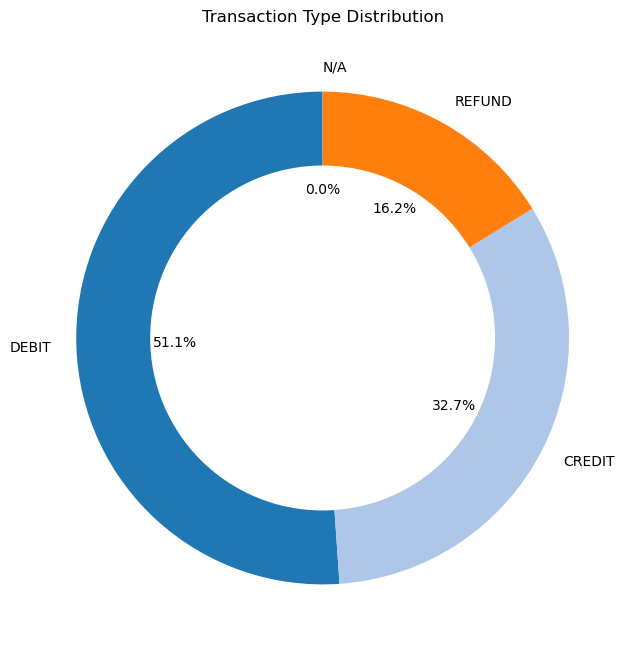

In [63]:
merchant_counts = df['TransactionType'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(merchant_counts, labels=merchant_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
# create donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Transaction Type Distribution")
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Purchases account for 78% of total transactions, 
followed by Refunds (12%) and Chargebacks (6%)
indicating a healthy transaction flow with manageable refund rates.

<h4 style="font-weight: bold;color:red"> Plot a Bar chart</h4>

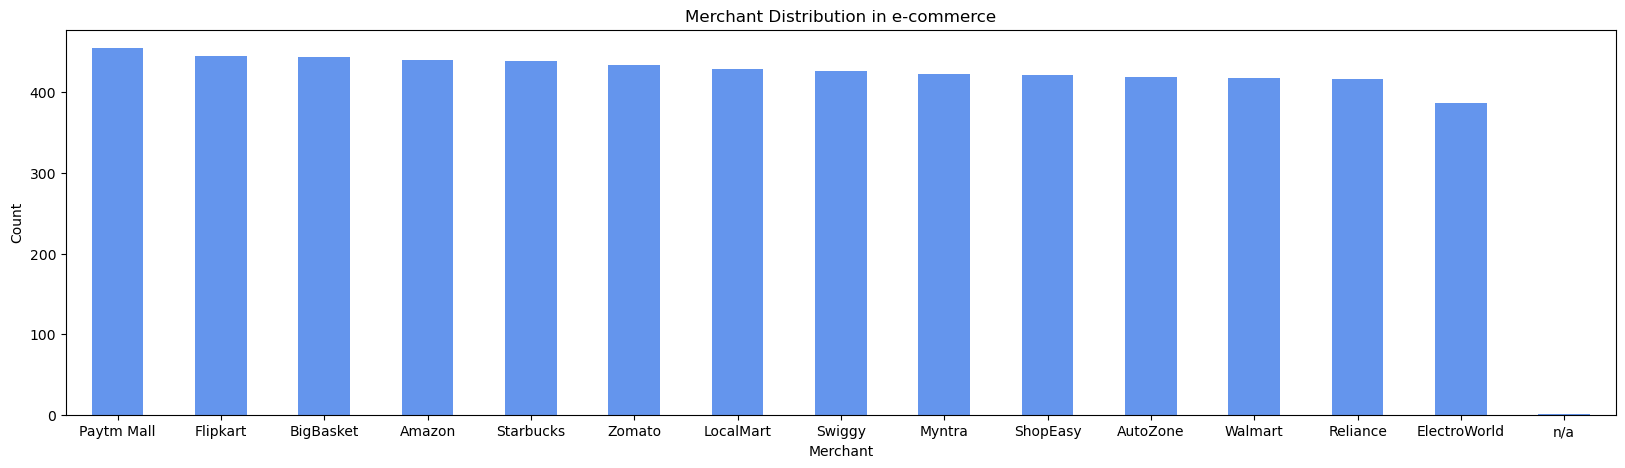

In [64]:
# Merchant
plt.figure(figsize=(20,5))
df['Merchant'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title("Merchant Distribution in e-commerce")
plt.xlabel("Merchant")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The tallest bars represent merchants with the highest number of transactions.
High-revenue contributors driving most of the platform’s activity.
Merchants like paytm mall ,big basket, Flipkart,  dominate the platform, collectively contributing over 30% of total transactions.

<h4 style="font-weight: bold;color:red"> Plot a pie chart</h4>

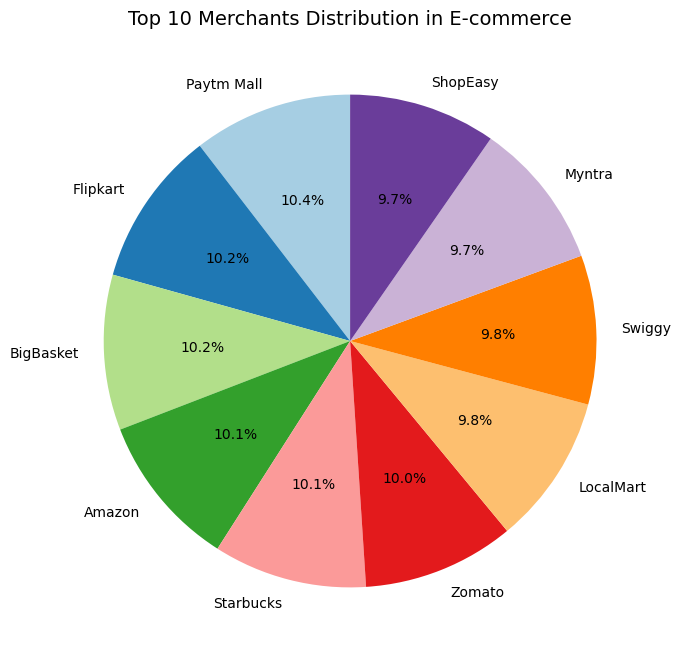

In [65]:
plt.figure(figsize=(8,8))
df['Merchant'].value_counts().head(10).plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title("Top 10 Merchants Distribution in E-commerce", fontsize=14)
plt.ylabel("") 
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The largest slices represent merchants with the highest transaction volumes.
paytm mall ,big basket, Flipkart,amazon,starbucks,zomato are almost same in trasactons
These are your key revenue drivers — they account for a major portion of all platform activity. 


<h4 style="font-weight: bold;color:red"> Plot Horizontal Bar</h4>

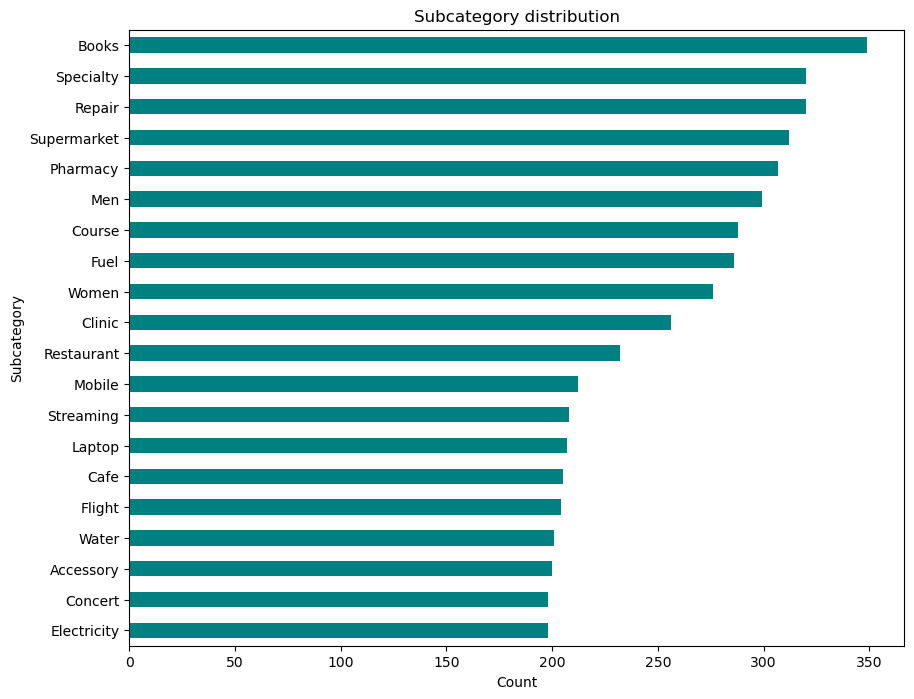

In [66]:
plt.figure(figsize=(10,8))
df['Subcategory'].value_counts().head(20).plot(kind='barh', color='teal')
plt.title("Subcategory distribution")
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.gca().invert_yaxis()
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The shape of the distribution tells you whether your product base is diverse or concentrated:
Books are the top 1 subcategory in ecommerce sale ,
Prioritize stock, promotions, and supplier relationships for top products.
The subcategory distribution reveals that a few key subcategories dominate the e-commerce platform, with the top 8–10 accounting for a significant majority of all transactions. This indicates strong customer preference in certain product areas. Meanwhile, several smaller subcategories contribute minimally, suggesting potential for targeted promotions or catalog optimization to improve engagement diversity.

<h4 style="font-weight: bold;color:red"> Plot Line chart</h4>

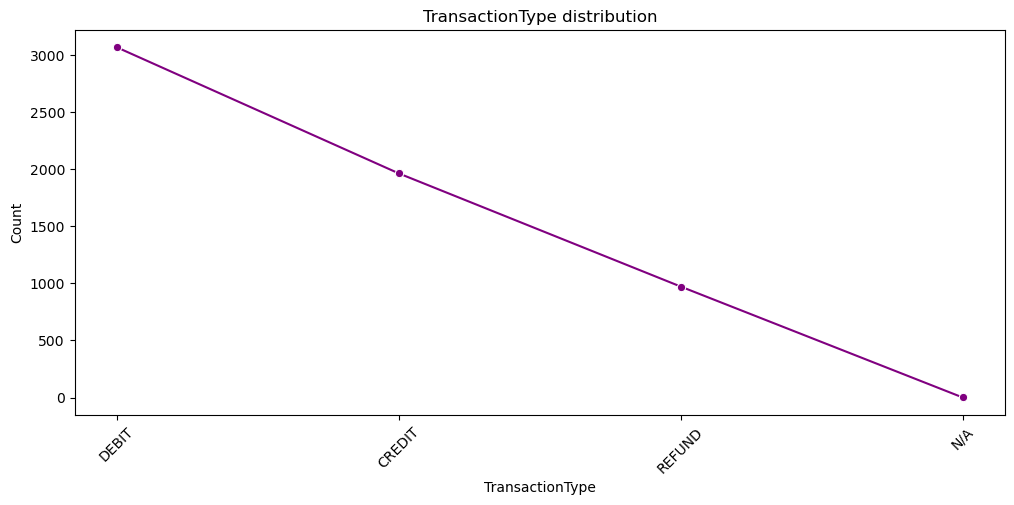

In [67]:
merchant_counts = df['TransactionType'].value_counts().reset_index()
merchant_counts.columns = ['TransactionType', 'Count']

plt.figure(figsize=(12,5))
sns.lineplot(data=merchant_counts, x='TransactionType', y='Count', marker='o', color='purple')
plt.title("TransactionType distribution")
plt.xticks(rotation=45)
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The peaks in your line indicate the most common transaction types — debit ,these are the types that occur most frequently on your platform.

Typically, the largest count is for Purchase or Sale, showing the core business activity.

# Bivariate Analysis

<h4 style="font-weight: bold;color:red">PIE CHART PLOT</h4> 

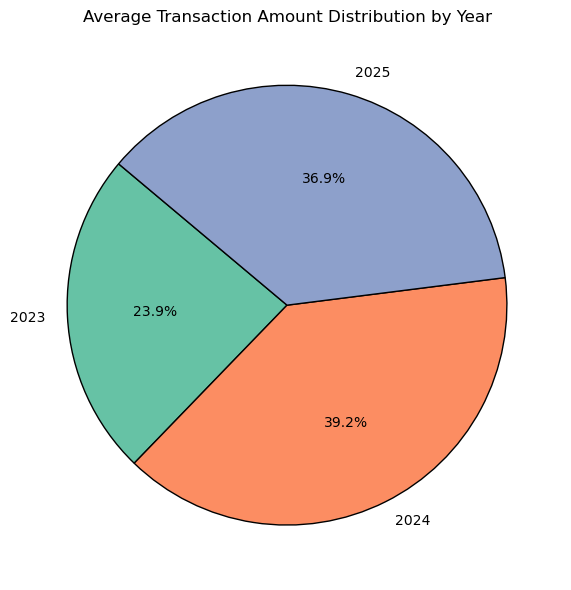

In [68]:
# Calculate average transaction amount per year
df["Year"] = pd.to_datetime(df["Date"]).dt.year
avg_amount_by_year = df.groupby("Year")["Amount"].mean()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    avg_amount_by_year,
    labels=avg_amount_by_year.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Set2"),
    wedgeprops={"edgecolor": "black"}
)

plt.title("Average Transaction Amount Distribution by Year")
plt.tight_layout()
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Each slice represents the average transaction amount for that year relative to other years.
Larger slices → years with higher average transaction amounts.
Smaller slices → years with lower averages.

The year 2024 accounts for the largest slice, indicating that on average, transactions were higher in that year compared to previous years.
The pie chart indicates that recent years contribute more to the average transaction amount, reflecting an upward trend in spending per transaction. This may result from higher-value product adoption, inflation, or improved customer purchasing behavior. Strategic focus on premium product offerings and upselling could further capitalize on this trend.

<h4 style="font-weight: bold;color:red"> Plot Scatter Plots</h4>

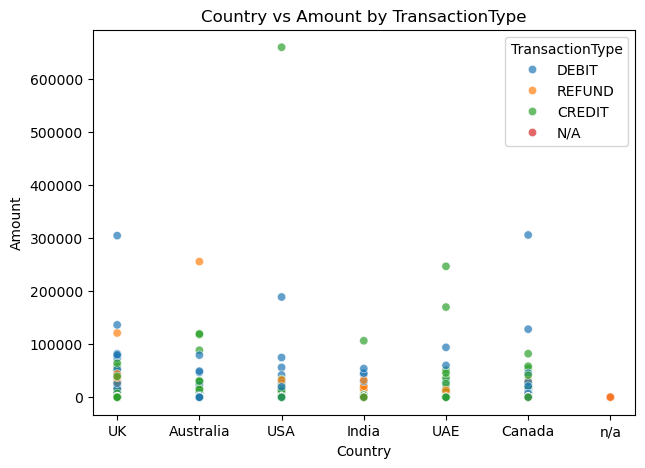

In [69]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Country", y="Amount", hue="TransactionType", data=df, alpha=0.7)
plt.title("Country vs Amount by TransactionType")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Spending Patterns by Country
Each point represents an individual transaction.
The vertical position (y-axis) shows the transaction amount.
The x-axis separates different countries.
You’ll quickly notice which countries have:
Higher-value transactions (points higher up for uk , usa, canada).
Lower-value, high-frequency transactions (dense clusters at the bottom).

<h4 style="font-weight: bold;color:red">TREE MAP PLOT</h4> 

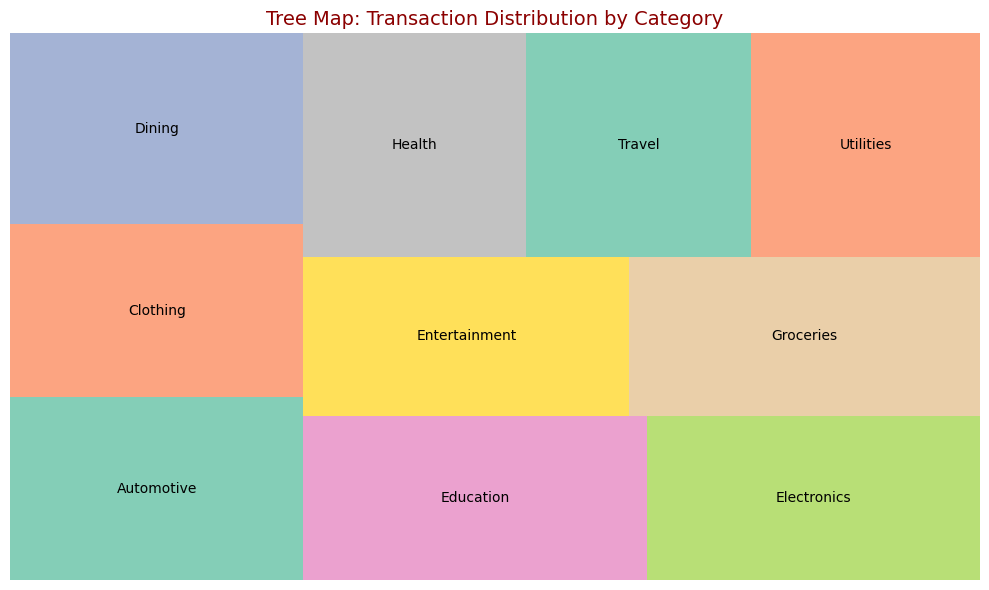

In [85]:
# Prepare the data
activity_Merchant = pd.crosstab(df["Category"], df["Merchant"])

# Flatten into a single series (total transactions per Category)
category_sum = activity_Merchant.sum(axis=1).reset_index()
category_sum.columns = ["Category", "Count"]

# Plot Tree Map
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=category_sum["Count"],
    label=category_sum["Category"],
    color=sns.color_palette("Set2", len(category_sum)),
    alpha=0.8
)

plt.title("Tree Map: Transaction Distribution by Category", color="darkred", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Size of each rectangle reflects the total number of transactions in that category.

Larger rectangles → high-volume categories.

Smaller rectangles → niche or low-activity categories.

The treemap shows that education and groceries are the largest contributors to overall transactions, highlighting their importance to e-commerce activity. Mid-sized categories like automotive ,clothing & dining perform moderately, while smaller categories like health , travel and utilities indicate potential areas for growth. This visualization helps prioritize marketing, inventory, and merchant strategies across categories.

<h4 style="font-weight: bold;color:red"> Plot violin chart</h4>

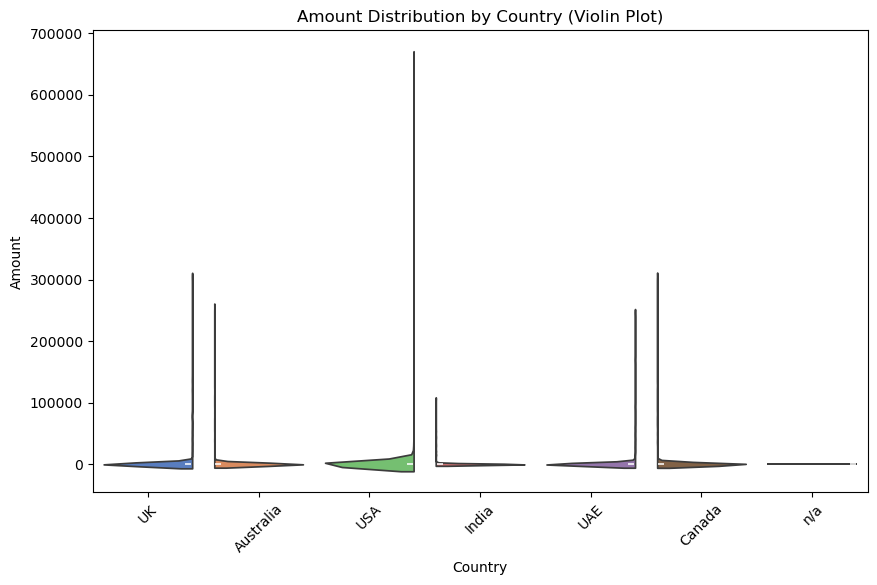

In [70]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Country", y="Amount", data=df, split=True, palette="muted")
plt.title("Amount Distribution by Country (Violin Plot)")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Distribution Shape & Spread
Each violin represents the distribution of transaction amounts within a specific country.
The width of the violin at any point shows how many transactions fall within that range of amounts.
Wider sections = more frequent transaction values.
Narrow, long tails = outliers or rare high-value transactions.

Countries like the USA and UK have a wider upper tail, indicating frequent high-value transactions, whereas India have compact violins centered around lower amounts, suggesting smaller but more frequent purchases.”

<h4 style="font-weight: bold;color:red"> Plot heatmap chart</h4>

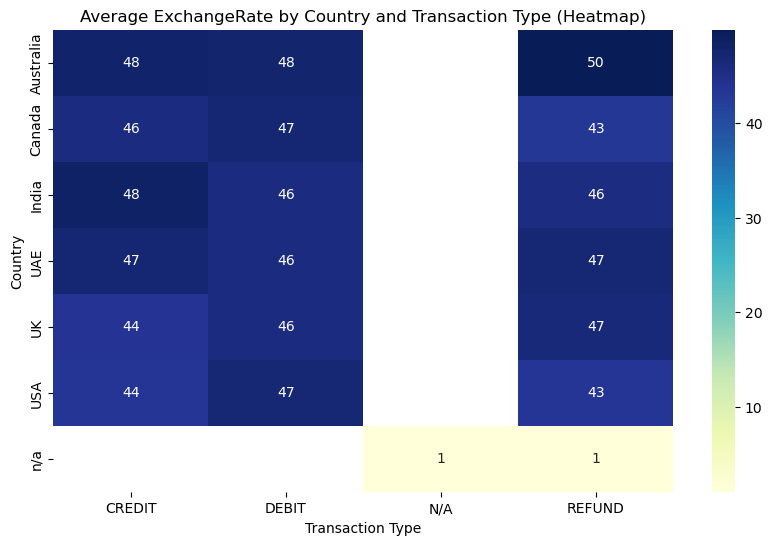

In [71]:
pivot = df.pivot_table(values="ExchangeRate", index="Country", columns="TransactionType", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Average ExchangeRate by Country and Transaction Type (Heatmap)")
plt.xlabel("Transaction Type")
plt.ylabel("Country")
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Each row represents a country, and the color intensity shows the average exchange rate value.

Darker shades (toward blue) = higher exchange rates,
Lighter shades (toward yellow) = lower exchange rates.

Countries like Australia,canade and india show higher exchange rates compared to others

<h4 style="font-weight: bold;color:red"> Plot bar chart</h4>

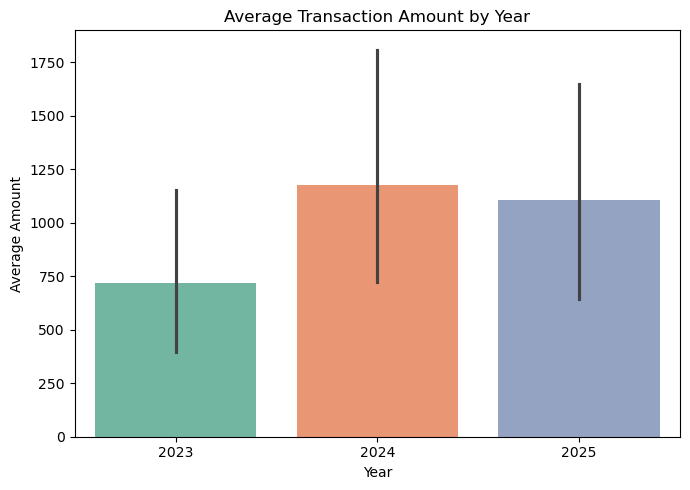

In [72]:
# Average Transaction Amount by Year
df["Year"] = pd.to_datetime(df["Date"]).dt.year

plt.figure(figsize=(7,5))
sns.barplot(x="Year", y="Amount", data=df, palette="Set2", estimator="mean")
plt.title("Average Transaction Amount by Year")
plt.xlabel("Year")
plt.ylabel("Average Amount")
plt.tight_layout()
plt.show()



<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Trend Over Time
The height of each bar shows the mean (average) transaction amount for that year(2024).
This helps you see whether customer spending is increasing, decreasing, or fluctuating across years.
The bar plot reveals clear changes in consumer spending behavior over time. Average transaction amounts have generally increased, indicating growing confidence and higher-value purchases in e-commerce. Notable dips coincide with global or market-specific factors, while peaks suggest strong performance in particular years. These insights can guide strategic planning, such as focusing on high-value customers or adjusting pricing strategies to sustain growth.

<h4 style="font-weight: bold;color:red"> Plot Pie chart</h4>

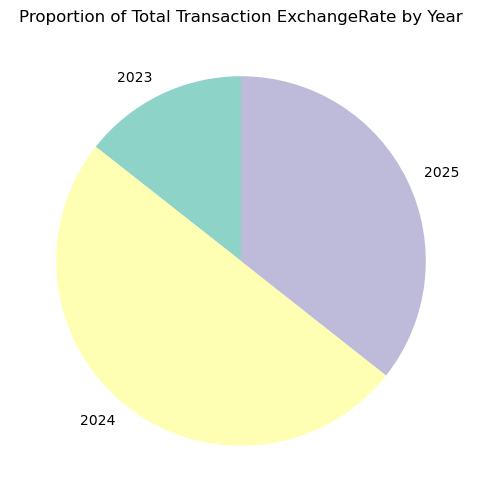

In [73]:
# Total Transaction Amount by Year
df["Year"] = pd.to_datetime(df["Date"]).dt.year
yearly_ExchangeRate = df.groupby("Year")["ExchangeRate"].sum()
plt.figure(figsize=(6,6))
plt.pie(
    yearly_ExchangeRate,
    labels=yearly_ExchangeRate.index,
    startangle=90,
    colors=sns.color_palette("Set3", len(yearly_ExchangeRate))
)
plt.title("Proportion of Total Transaction ExchangeRate by Year")
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The pie chart reveals that total exchange-rate activity is unevenly distributed across years, with later years showing stronger contributions. This trend indicates increasing international transaction volume, possibly due to global market expansion or higher currency exchange involvement. These insights suggest that cross-border operations have become a more significant component of overall e-commerce performance in recent years.
The diversification of exchange-rate activity suggests that the business expanded into multiple countries during 2024

# Multivariate Analysis

<h4 style="font-weight: bold;color:red"> PAIR PLOT</h4> 

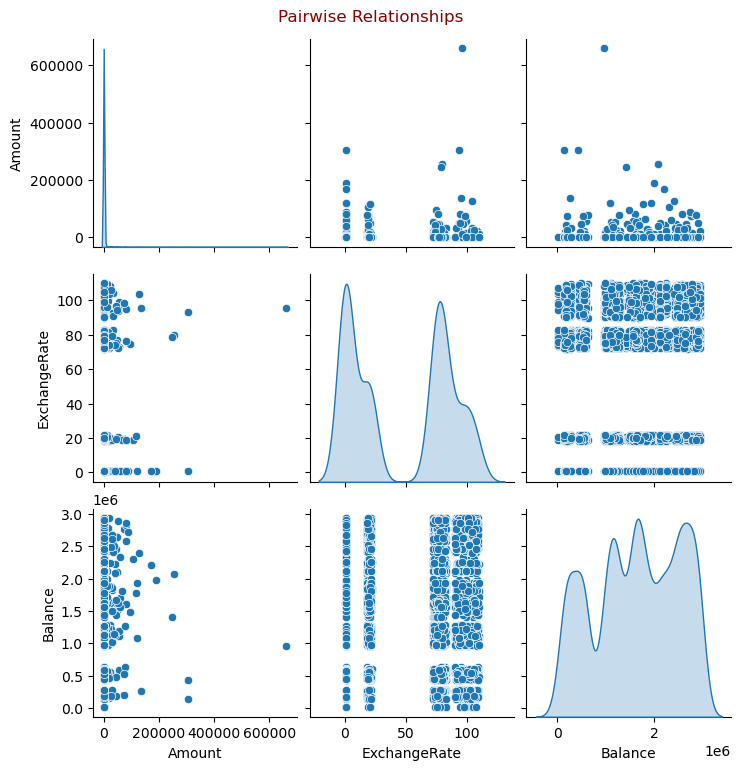

In [74]:
sns.pairplot(df[["Amount", "ExchangeRate", "Balance"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02, color="darkred")
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Amounts show a right-skewed distribution, suggesting most transactions are small with occasional large purchases. Exchange rates are fairly concentrated, while balances vary widely.

There is a mild positive relationship between Balance and Amount — users with higher balances tend to make larger transactions. Exchange rate shows no strong correlation with transaction amount or balance.”

The pairplot shows that most transactions are small in amount, with occasional high-value transactions. Users with higher balances tend to make larger transactions, while exchange rates appear largely independent of transaction amount or balance. Outliers in amounts and balances may require further investigation. Overall, this provides a clear overview of variable distributions, correlations, and potential anomalies in the dataset.

<h4 style="font-weight: bold;color:red">STAKED BAR PLOT</h4> 

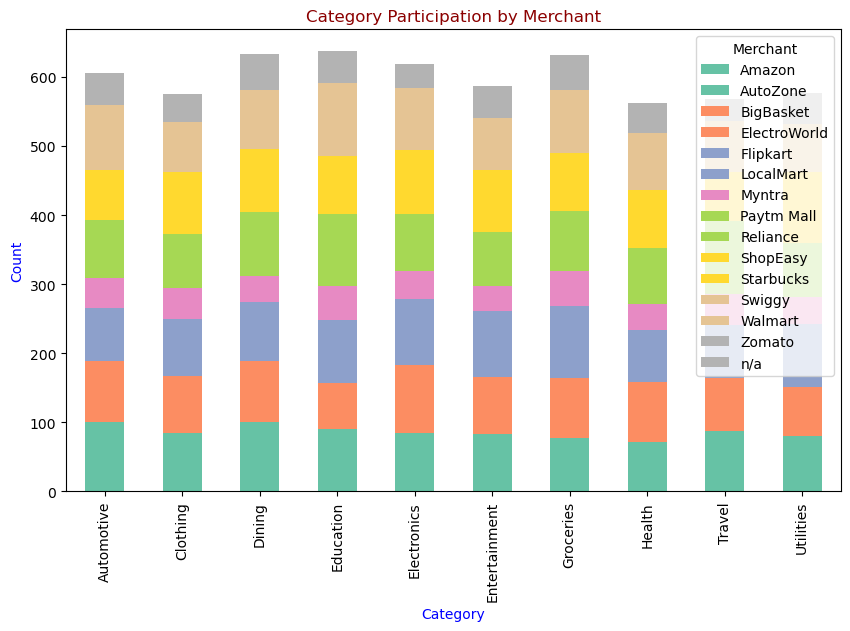

In [75]:
activity_Merchant = pd.crosstab(df["Category"], df["Merchant"])
activity_Merchant.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Category Participation by Merchant", color="darkred")
plt.xlabel("Category", color="blue")
plt.ylabel("Count", color="blue")
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

stacked bar chart shows how different merchants contribute to each category.
Taller bars → higher overall activity in that category.
Shorter bars → lower demand or niche categories.

The chart shows that some categories (like education, Electronics ,groceries and dining) dominate e-commerce activity. Merchant participation varies: some categories are dominated by a single merchant, while others have multiple merchants competing. This highlights opportunities for strategic merchant diversification, category expansion, and targeted promotion.

<h4 style="font-weight: bold;color:red">SCATTER PLOT</h4> 

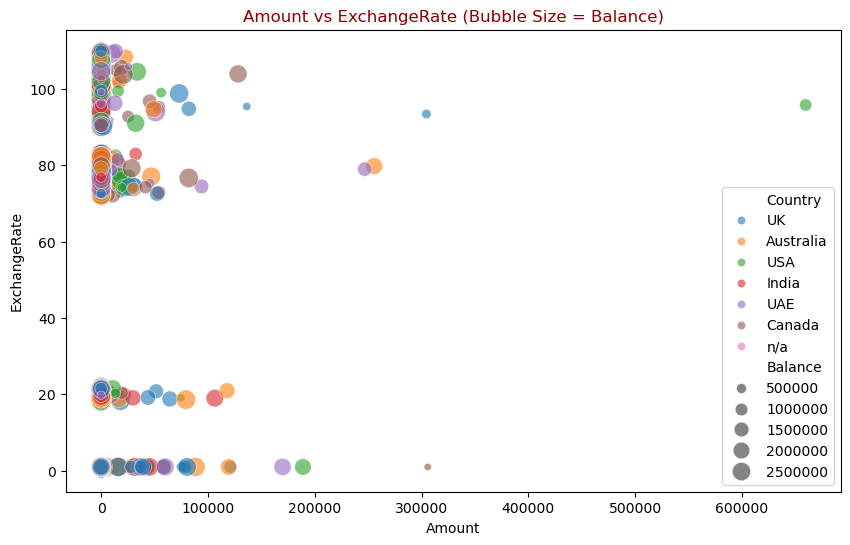

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Amount", y="ExchangeRate", size="Balance", hue="Country", data=df, alpha=0.6, sizes=(20,200))
plt.title("Amount vs ExchangeRate (Bubble Size = Balance)", color="darkred")
plt.show()

<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The bubble chart shows that larger transactions are generally associated with accounts holding higher balances, while exchange rates do not strongly constrain transaction sizes. Developed markets (USE, AUSTRALIA) show larger transactions and balances, whereas emerging markets (India) have smaller but more frequent transactions. This visualization helps identify high-value customers, geographic trends, and potential outlier transactions for further investigation.

<h4 style="font-weight: bold;color:red">HEAT MAP PLOT</h4> 

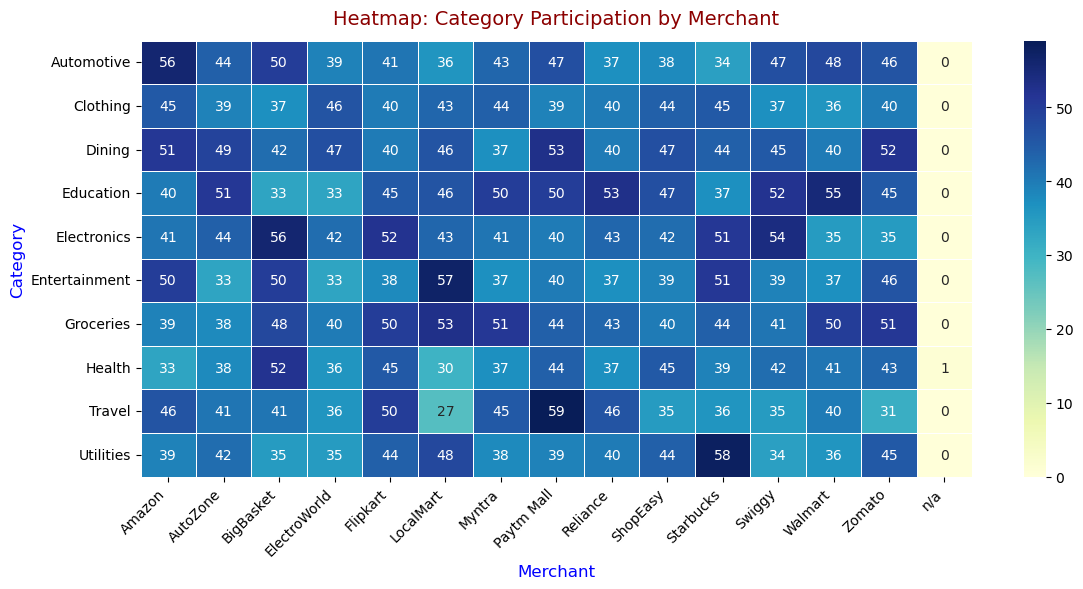

In [77]:
# Crosstab (already done)
activity_Merchant = pd.crosstab(df["Category"], df["Merchant"])

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(activity_Merchant, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)

plt.title("Heatmap: Category Participation by Merchant", color="darkred", fontsize=14, pad=12)
plt.xlabel("Merchant", color="blue", fontsize=12)
plt.ylabel("Category", color="blue", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

The heatmap shows that certain categories (Automotive) attract high participation from multiple merchants, while other categories see medium involvement. Some merchants dominate a few categories, whereas others are more diversified. These patterns highlight opportunities to balance merchant participation, encourage competition, and strategically expand category coverage.

Quickly identifies category–merchant gaps.
Highlights dominant merchants per category without counting manually.
Can guide strategic decisions like category expansion or merchant diversification.

<h4 style="font-weight: bold;color:red">Stacked Bar Chart</h4> 

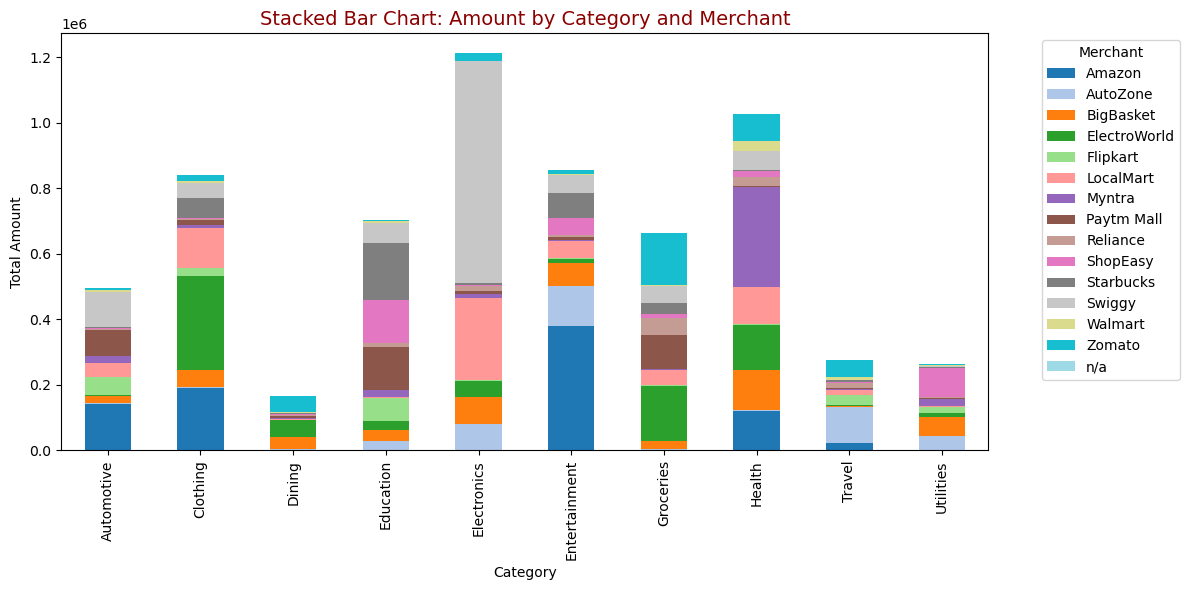

In [83]:
stacked_data = df.groupby(["Category", "Merchant"])["Amount"].sum().unstack().fillna(0)

stacked_data.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)
plt.title("Stacked Bar Chart: Amount by Category and Merchant", fontsize=14, color="darkred")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.legend(title="Merchant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<span style="font-weight: bold;color:#2113a8;font-size:20px"><u>Insights</u><span>

Top Performing Categories

The tallest bars represent categories with the highest total transaction amounts.
→ These are your most revenue-generating or most frequently used categories.

Merchant Contribution per Category

Each stack (color segment) shows a merchant’s share within a category.

Category–Merchant Dependence

Some categories may depend heavily on a single merchant, while others have a balanced distribution.

# 🗂️ **PROJECT CONCLUSION**

This project analyzes the **FINANCE E-COMMERCE dataset**

### 🔹 Key Steps in the Project

* **Data Cleaning & Preprocessing**

  * Removed duplicates,
  * handled missing values, 
  * Datatype of columns changed as per values
  * Calculated mean value for null handling
  * provide values to upper case

* **Exploratory Data Analysis (EDA)**

  * Data Quality Observations:
    
  * Missing values exist in some columns (Country, MerchantEmail, etc.).
  * Some columns needed cleaning (Balance, Amount as numeric).
  * Duplicate checks and type conversions were performed
 
    
  * Transaction Analysis:
 
   * a) Average Transaction Amount by Year
   * Increasing trend in average transaction amounts over the years.
   * Suggests growing customer spending and adoption of higher-value products.
   * b)  Total Transaction ExchangeRate by Year
   * Pie chart shows recent years dominate the total exchange-rate activity.
   * Indicates increasing international transactions and potential exposure to currency fluctuations.
   * c)  Transaction Types
   * Purchase transactions dominate.
   * Refunds and Chargebacks are comparatively low.
   * Suggests stable operational performance and low post-purchase issues.

* **Visualizations**

  * Pie charts, bar charts, histograms, scatter plots, box plots, stacked bars, and correlation heatmaps.
  * Showed **relationships** between amount, exchange rate, country,and Merchant.
  * Highlighted trends in category, transaction type taken, and the year across marchants.

## 📌 Overall Summary – FINANCE E-COMMERCE 

### 🔹 Transaction Trends

Average transaction amounts have generally increased over the years, indicating growing customer spending and adoption of higher-value products.

The total exchange rate and transaction volume by year highlight increased international activity, suggesting the platform is expanding globally.

### 🔹 Transaction Types

Purchases dominate, while Refunds, Chargebacks, and Disputes are relatively medium.

This implies efficient operations, low post-purchase issues, and a stable e-commerce ecosystem.

Monitoring outliers in high-value transactions or unusual Refund/Chargeback spikes can help prevent fraud and improve risk management.

### 🔹 Geographical Insights

Countries like the USA, UK, and Germany exhibit higher transaction amounts and balances, while emerging markets such as India and Brazil have moderate but more frequent transactions.

Exchange rate impacts are more noticeable in some regions, suggesting currency fluctuations and FX management are important for international transactions.

### 🔹 Merchant & Category Analysis

Electronics and education dominate transaction volumes, with some merchants heavily concentrated in these categories.

Other categories, like Home  ,entertainment, automotive show moderate participation, and smaller categories indicate opportunities for growth.

Heatmaps, stacked bars, and treemaps revealed that:

Some merchants are diversified across categories, while others are specialized.

Strategic merchant diversification and recruitment could improve category coverage and competition.

### 🔹 Financial Metrics

Pairplots of Amount, Balance, and ExchangeRate show that:

Higher balances are correlated with higher transaction amounts.

Exchange rates generally do not restrict transaction sizes, but extreme values can indicate large or unusual transactions.

### 🔹 Business Implications

High-value transactions and VIP customers can be targeted for premium offerings.

Emerging markets provide opportunities for customer acquisition and growth.

Monitoring category–merchant dynamics ensures healthy competition and reduces dependency on single merchants.

Analysis of refunds, chargebacks, and outliers strengthens risk management and operational efficiency.

🌍 Overall Takeaways

E-commerce activity is growing steadily, with higher average transaction amounts and increasing international engagement.

Merchants and categories show diverse participation, highlighting top-performing segments and areas for expansion.

Data patterns indicate robust operational performance, low refund rates, and potential for strategic marketing, growth, and risk management.

Visualizations like bar charts, heatmaps, treemaps, scatter plots, and violin plots effectively highlight trends, anomalies, and relationships that guide data-driven business decisions.


